## Sandbox for Implementing RetinaNet

Practice training runs on complex deep networks and experiment with object detection pipeline. Includes implementation of Feature Pyramid Networks, and RetinaNet. 

## General Approach

1. Download COCO
- Build and train FPN
- Build and train RetinaNet

In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
from fastai.vision import *
from fastai.datasets import *
from fastai.callbacks import *

## COCO

In [5]:
path = Path('/home/sudosharma/projects/data/coco_tiny')
images, lbl_bbox = get_annotations(path/'train.json')
img2bbox = dict(zip(images, lbl_bbox))

In [9]:
get_y_fn = lambda o: img2bbox[o.name]

def get_data(bs=64, path=path):
    """Create data loader with different batch sizes and size of image."""
    return (ObjectItemList.from_folder(path)
            .split_by_rand_pct()
            .label_from_func(get_y_fn)
            .databunch(bs=bs, collate_fn=bb_pad_collate))

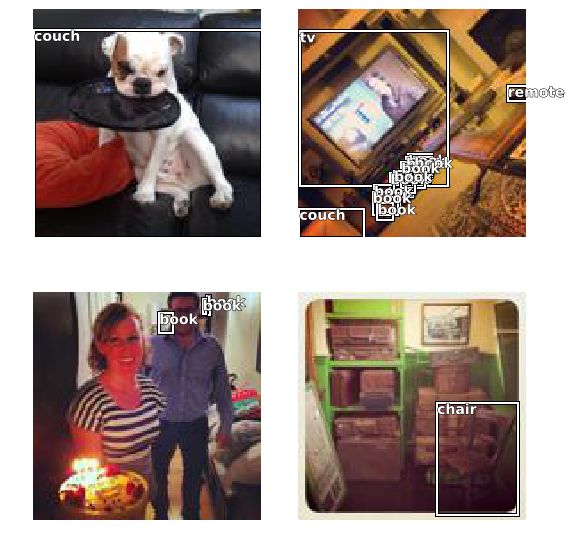

In [10]:
data = get_data()
data.show_batch(rows=2)

## RetinaNet

<b>TODO:</b>
1. pull pretrained resnet
- extract feature maps from pretrained resnet
- concat feature maps in cross-connections
- incorporate predictions at each level and push through 1by1 conv
- figure out focal loss
- add classification subnet
- add regression subnet
- train on coco tiny
- train on coco
- see if you can match paper

In [11]:
base = models.resnet18(pretrained=True)

In [12]:
base

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co